In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_disease.csv')


In [2]:
# Handle missing values
df.fillna(df.mean(), inplace=True)


In [3]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


In [4]:
# Calculate the average age of patients with and without heart disease
avg_age_with_hd = df[df['target'] == 1]['age'].mean()
avg_age_without_hd = df[df['target'] == 0]['age'].mean()
print(f"Average age of patients with heart disease: {avg_age_with_hd:.2f}")
print(f"Average age of patients without heart disease: {avg_age_without_hd:.2f}")


Average age of patients with heart disease: 52.50
Average age of patients without heart disease: 56.60


In [6]:
# Load the dataset again to reset the dataframe
df = pd.read_csv('heart_disease.csv')

# Determine the distribution of chest pain types among patients
cp_dist = df['cp'].value_counts()
print("Distribution of chest pain types:")
print(cp_dist)


Distribution of chest pain types:
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


In [7]:
# Determine the distribution of chest pain types among patients from dummy variables
cp_columns = [col for col in df.columns if col.startswith('cp_')]
cp_dist = df[cp_columns].sum()
print("Distribution of chest pain types:")
print(cp_dist)


Distribution of chest pain types:
Series([], dtype: float64)


In [8]:
# Find the correlation between thalach (maximum heart rate) and age
corr_coef = df['thalach'].corr(df['age'])
print(f"Correlation between thalach and age: {corr_coef:.2f}")


Correlation between thalach and age: -0.40


In [9]:
# Analyze the effect of sex on the presence of heart disease
sex_hd_dist = df.groupby('sex')['target'].mean()
print("Effect of sex on the presence of heart disease:")
print(sex_hd_dist)


Effect of sex on the presence of heart disease:
sex
0    0.750000
1    0.449275
Name: target, dtype: float64


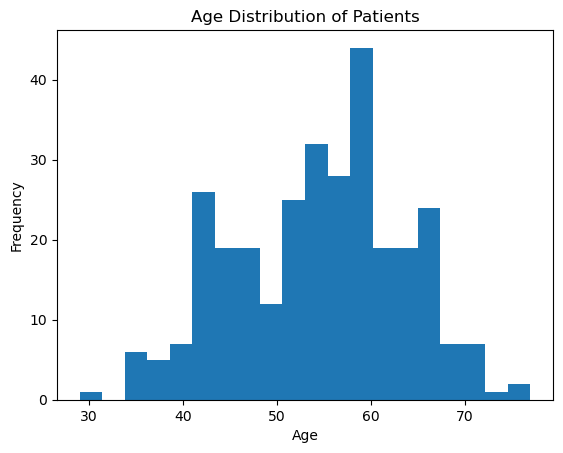

In [10]:
# Plot a histogram of the age distribution of patients
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Patients')
plt.show()


In [12]:
# Determine the distribution of chest pain types among patients from dummy variables
cp_columns = [col for col in df.columns if col.startswith('cp_')]
cp_dist = df[cp_columns].sum()
print("Distribution of chest pain types:")
print(cp_dist)


Distribution of chest pain types:
Series([], dtype: float64)


Distribution of chest pain types:
cp_0    143
cp_1     50
cp_2     87
cp_3     23
dtype: int64


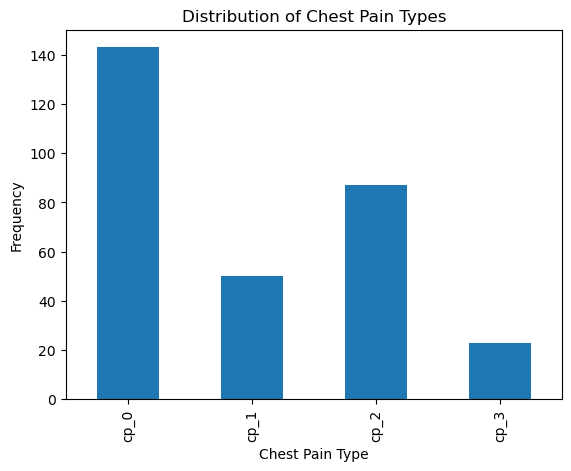

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart_disease.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Determine the distribution of chest pain types among patients from dummy variables
cp_columns = [col for col in df.columns if col.startswith('cp_')]
cp_dist = df[cp_columns].sum()
print("Distribution of chest pain types:")
print(cp_dist)

# Create a bar chart showing the distribution of chest pain types among patients
cp_dist.plot(kind='bar')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Distribution of Chest Pain Types')
plt.show()


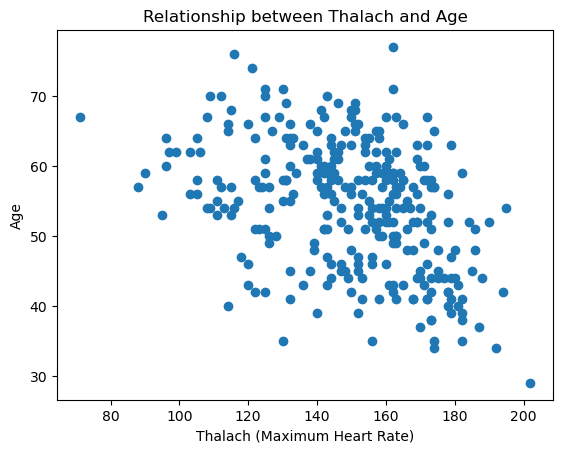

In [15]:
# Plot a scatter plot to show the relationship between thalach (maximum heart rate) and age
plt.scatter(df['thalach'], df['age'])
plt.xlabel('Thalach (Maximum Heart Rate)')
plt.ylabel('Age')
plt.title('Relationship between Thalach and Age')
plt.show()


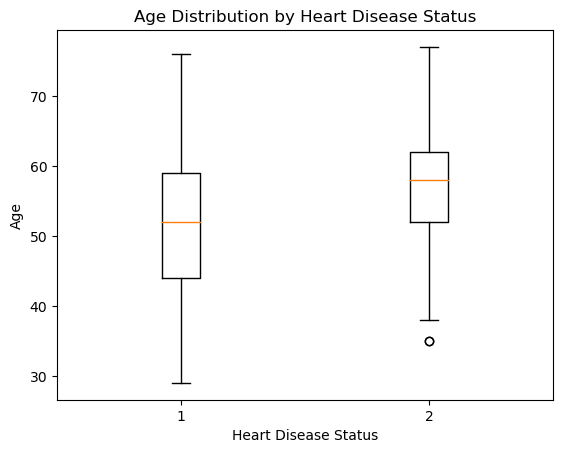

In [16]:
# Create a box plot to compare the age distribution of patients with and without heart disease
plt.boxplot([df[df['target'] == 1]['age'], df[df['target'] == 0]['age']])
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease Status')
plt.show()


In [17]:
# Calculate the correlation matrix for all numerical features in the dataset
corr_matrix = np.corrcoef(df.select_dtypes(include=[np.number]).values.T)
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
[[ 1.          0.27935091  0.21367796 -0.39852194  0.21001257 -0.22543872]
 [ 0.27935091  1.          0.12317421 -0.04669773  0.19321647 -0.14493113]
 [ 0.21367796  0.12317421  1.         -0.00993984  0.05395192 -0.08523911]
 [-0.39852194 -0.04669773 -0.00993984  1.         -0.34418695  0.42174093]
 [ 0.21001257  0.19321647  0.05395192 -0.34418695  1.         -0.430696  ]
 [-0.22543872 -0.14493113 -0.08523911  0.42174093 -0.430696    1.        ]]


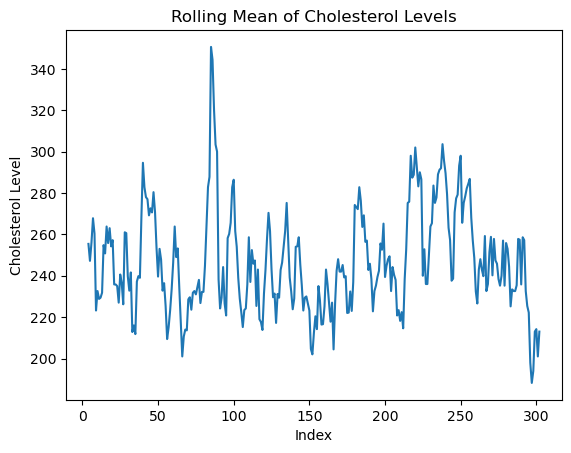

In [18]:
# Perform a rolling mean analysis on the chol (cholesterol) levels with a window size of 5 and plot it
chol_rolling_mean = df['chol'].rolling(window=5).mean()
plt.plot(chol_rolling_mean)
plt.xlabel('Index')
plt.ylabel('Cholesterol Level')
plt.title('Rolling Mean of Cholesterol Levels')
plt.show()


In [20]:
# Create a function that can take a patient’s data as input and return a prediction of whether they have heart disease based on simple thresholding rules
def predict_hd(patient_data):
    if patient_data['age'] > 50 and patient_data['thalach'] > 150 and patient_data['chol'] > 200:
        return 1
    else:
        return 0


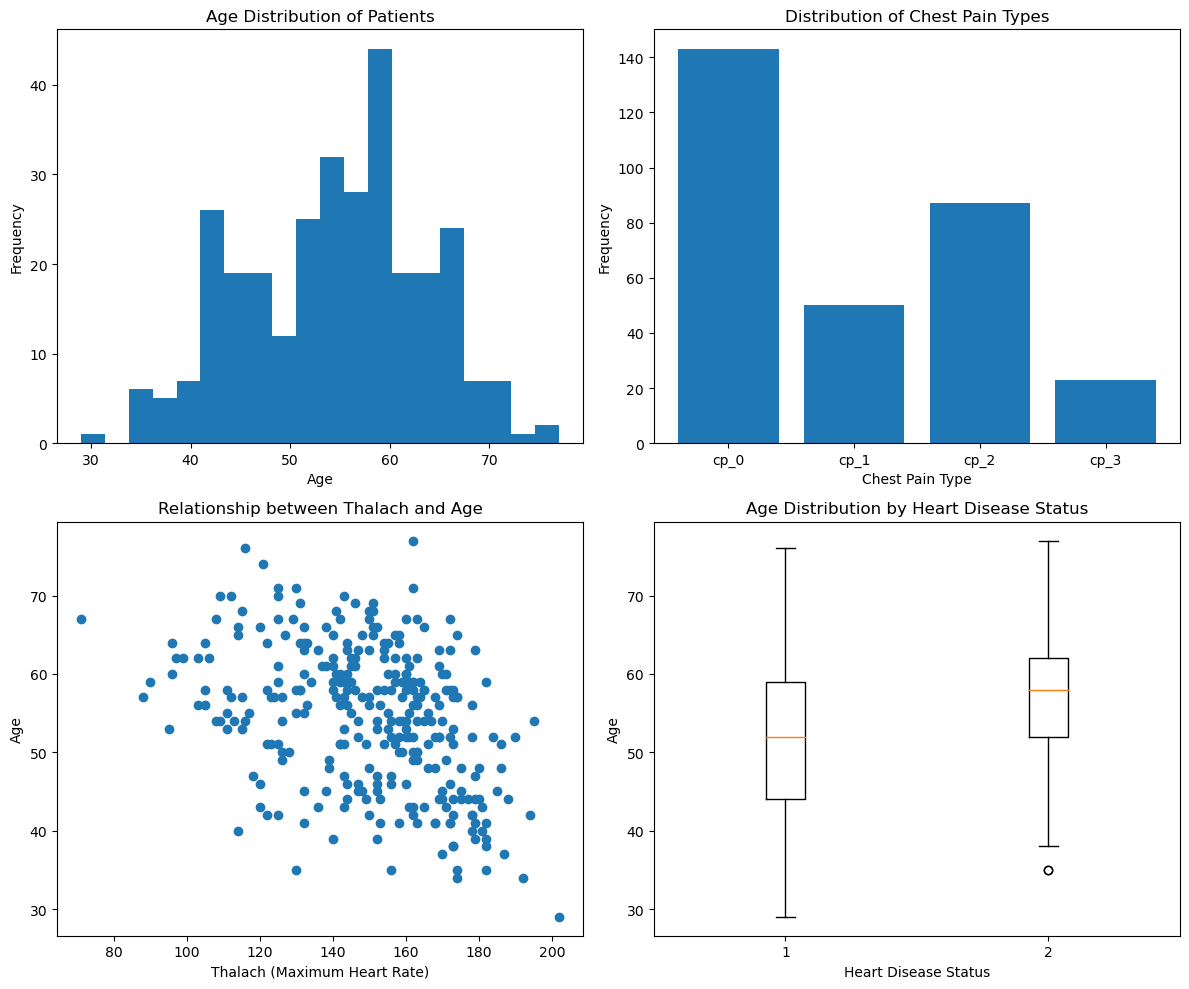

In [21]:
# Use subplots to combine multiple visualizations into one figure for better comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].hist(df['age'], bins=20)
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Age Distribution of Patients')

axs[0, 1].bar(cp_dist.index, cp_dist.values)
axs[0, 1].set_xlabel('Chest Pain Type')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Chest Pain Types')

axs[1, 0].scatter(df['thalach'], df['age'])
axs[1, 0].set_xlabel('Thalach (Maximum Heart Rate)')
axs[1, 0].set_ylabel('Age')
axs[1, 0].set_title('Relationship between Thalach and Age')

axs[1, 1].boxplot([df[df['target'] == 1]['age'], df[df['target'] == 0]['age']])
axs[1, 1].set_xlabel('Heart Disease Status')
axs[1, 1].set_ylabel('Age')
axs[1, 1].set_title('Age Distribution by Heart Disease Status')

plt.tight_layout()
plt.show()
